In [25]:
import xgboost as xgb
import pandas as pd
import numpy as np
import os

# Training script for New York City taxi trip data
#
# Author: Tianyu Li
# Created on Feb 13th, 2019

# Load csv files into Pandas
rawdata = pd.read_csv("train.csv")

# Data cleaning helper function for NYC taxi data
#
# Inputs:
# data:pandas data frame to be cleaned)
def clean_data(data):
    # Load csv file into Pandas
    data = pd.read_csv("train.csv")
    
    # Data cleaning
    # Convert id to integer
    data.id = data.id.apply(lambda x: int(str(x)[2:]))
    
    # Convert pickup/dropoff time to unix timestamp
    data.pickup_datetime = data.pickup_datetime.apply(pd.Timestamp)
    data.pickup_datetime = data.pickup_datetime.astype(np.int64) // 10 ** 9
    
    data.dropoff_datetime = data.dropoff_datetime.apply(pd.Timestamp)
    data.dropoff_datetime = data.dropoff_datetime.astype(np.int64) // 10 ** 9
    
    # Convert the flag to 0 and 1 where 0 = Yes and 1 = No
    data.store_and_fwd_flag = data.store_and_fwd_flag.map(dict(Y = 1, N = 0))
    
    return data

# Clean data
cleaned_data = clean_data(rawdata)

# Load cleaned data to xgboost regressor
traindata = xgb.DMatrix(data = cleaned_data.iloc[:100000, :-1], label = cleaned_data.iloc[:100000, -1])
testdata = xgb.DMatrix(data = cleaned_data.iloc[100000:, :-1], label = cleaned_data.iloc[100000:, -1])

# Setting Parameters
param = {'max_depth' : 2, 'eta' : 1, 'silent' : 1, 'objective' : 'survival:cox'}
watchlist = [(testdata, 'test'), (traindata, 'train')]

# Training
num_round = 20
result = dict()

print("Start Training")
bst = xgb.train(param, traindata, num_round, watchlist, evals_result = result)



Start Training
[0]	test-cox-nloglik:13.0459	train-cox-nloglik:10.4369
[1]	test-cox-nloglik:13.0029	train-cox-nloglik:10.3941
[2]	test-cox-nloglik:12.9898	train-cox-nloglik:10.3808
[3]	test-cox-nloglik:12.9834	train-cox-nloglik:10.373
[4]	test-cox-nloglik:12.978	train-cox-nloglik:10.368
[5]	test-cox-nloglik:12.9761	train-cox-nloglik:10.3658
[6]	test-cox-nloglik:12.9777	train-cox-nloglik:10.366
[7]	test-cox-nloglik:12.9765	train-cox-nloglik:10.3639
[8]	test-cox-nloglik:12.9367	train-cox-nloglik:10.3218
[9]	test-cox-nloglik:12.9331	train-cox-nloglik:10.3181
[10]	test-cox-nloglik:12.9304	train-cox-nloglik:10.3154
[11]	test-cox-nloglik:12.9288	train-cox-nloglik:10.3135
[12]	test-cox-nloglik:12.9176	train-cox-nloglik:10.3004
[13]	test-cox-nloglik:12.9128	train-cox-nloglik:10.2987
[14]	test-cox-nloglik:12.9105	train-cox-nloglik:10.2967
[15]	test-cox-nloglik:12.9014	train-cox-nloglik:10.2872
[16]	test-cox-nloglik:12.8986	train-cox-nloglik:10.2843
[17]	test-cox-nloglik:12.8893	train-cox-nloglik

In [26]:
result = pd.concat([pd.DataFrame.from_dict(result['train']), pd.DataFrame.from_dict(result['test'])], axis = 1)
result.columns = ['train', 'test']
result

,train,test
0,10.436918,13.045907
1,10.394095,13.002864
2,10.380829,12.989767
3,10.372975,12.983361
4,10.367964,12.977985
5,10.365777,12.976084
6,10.366003,12.977664
7,10.363889,12.976542
8,10.321839,12.936655
9,10.318089,12.933073


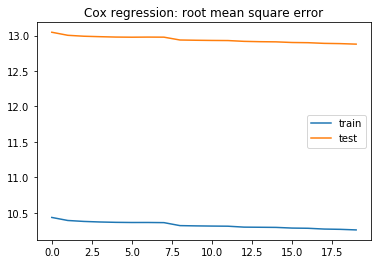

In [27]:
result.plot.line(title = 'Cox regression: negative log likehood')